# Tandem Piercer Experiment - Measurement report

Load Python libraries:

In [1]:
import os
from tpe.Stats import Stats
from tpe.functions import md, load_styles, get_report_header

Load inline graphics utility (and optionally output current working directory name):

In [2]:
%pylab inline
#print("\nCurrent directory: %s" % os.getcwd())

Populating the interactive namespace from numpy and matplotlib


Initialize statistic class and output experiment statistic files to use in this report:

In [3]:
st = Stats()
st.print_experiment_stat_files("../experiments/default_2022_2_21*");

../experiments\default_2022_2_21_10_50\statistics.csv


Output header, general settings, instrument details and trigger info for the selected measurement:

In [4]:
directory1 = "../experiments\default_2022_2_21_10_50"
get_report_header(directory1)

<h2>Background whole spectrum</h2><h3>General settings</h3>                <table>                <tr><th>Pulse source</th><td>Background</td></tr>                <tr><th>Pulse detection</th><td>SCA `(pos[:-1] & ~pos[1:]).nonzero()`</td></tr>                <tr><th>Sample size</th><td>8e-06s</td></tr>                <tr><th>Resolution</th><td>8e-09s</td></tr>                <tr><th>PicoScope trigger</th><td>simple, alternate: True </td></tr>                <tr><th>Detector geometry</th><td>tandem</td></tr>                <tr><th>Front detector</th><td>A</td></tr>                <tr><th>PMT High Voltage</th><td>-1000</td></tr>                </table>
<h3>SCA instrument details</h3>
|             | Detector A   | Detector B   |
|:------------|:-------------|:-------------|
| Sca Model   | Ortec 490B   | Ortec 490B   |
| Coarse Gain | 4.0          | 4.0          |
| Fine Gain   | 3.75         | 10.0         |
| Mode        | diff         | diff         |
| Window      | 10.0         | 10.0         |
| Lower Level | 0.7          | 0.4          |
<h3>ADC limits for PicoScope channels</h3>
|                 | A (0)   | B (1)   | C (2)   | D (3)   |
|:----------------|:--------|:--------|:--------|:--------|
| Voltage range   | 10V     | 10V     | 20V     | 20V     |
| ADC low limits  | 4096    | 4096    | 842     | 576     |
| ADC high limits | 32768   | 32768   | 19661   | 19661   |
<h3>PicoScope channel map</h3>
|                        |   Detector A |   Detector B |
|:-----------------------|-------------:|-------------:|
| Sca Square Pulse Index |            0 |            1 |
| Raw Pulse Index        |            2 |            3 |
<h3>PicoScope trigger details</h3>            <table>            <tr><th>Channel (start)</th><td>0</td></tr>            <tr><th>Delay</th><td>0</td></tr>            <tr><th>Direction</th><td>2</td></tr>            <tr><th>Threshold</th><td>16384</td></tr>            </table>


In [5]:
st = Stats()
st.read_stats_dataframe(directory1);
st.print_basic_data();



Start time:	2022-02-21 08:50:40
End time:	2022-02-21 14:50:40
Time elapsed:	6:00:00
Rows count:	156964
Total count A:	78814
Total count B:	78818
Elapsed rate A:	3.6/s
Elapsed rate B:	3.6/s
Sample rate A:	125500.7/s
Sample rate B:	125497.3/s


Total coincidences:		662
Single coincidences:		662
Coincidence elapsed rate:	0.0/s
Coincidence sample rate:	1353.0/s


### Calibration

Energy scales have been calibrated with Cadmium-109 source. Calibration document can be found from: https://nbviewer.org/github/markomanninen/tandempiercerexperiment/blob/main/report_template/TPE%20report%20-%20whole%20spectra%20calibration.ipynb

In [6]:
from tpe.Stats import add_calibration_line, plot_peak_lines

gamma_photo_peak_cd109_kev = 88
# Cd-109 1μci
gamma_photo_peak_cd109_adc_a = 6181
gamma_photo_peak_cd109_adc_b = 6729
# Cd-109 10μci
#gamma_photo_peak_cd109_adc_a = 6261
#gamma_photo_peak_cd109_adc_b = 6453

gamma_photo_peak_co57_kev = 122
gamma_photo_peak_co57_adc_a = 8532
gamma_photo_peak_co57_adc_b = 8684

st.adc_calibrate_a(gamma_photo_peak_cd109_adc_a, gamma_photo_peak_cd109_kev)
st.adc_calibrate_b(gamma_photo_peak_cd109_adc_b, gamma_photo_peak_cd109_kev)

### Detector clicks timeline

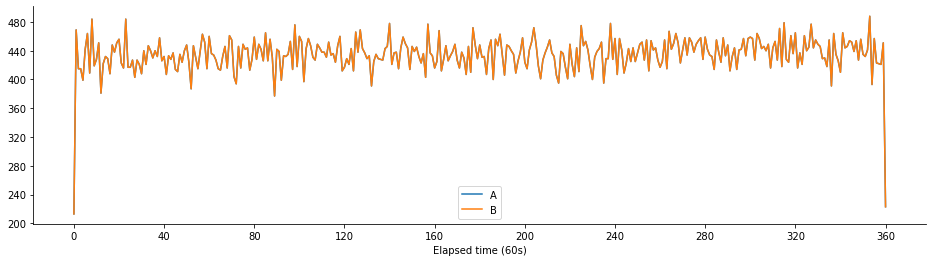

In [7]:
st.plot_channel_counts(sec=60)

### Pulse height spectrum

Plot pulse height spectrum by bar graph, line graph, fitted curve and scatter version.

Peaks are automatically detected by using `scipy.find_peaks` algorithm and then drawn to the plots.

#### Channel A

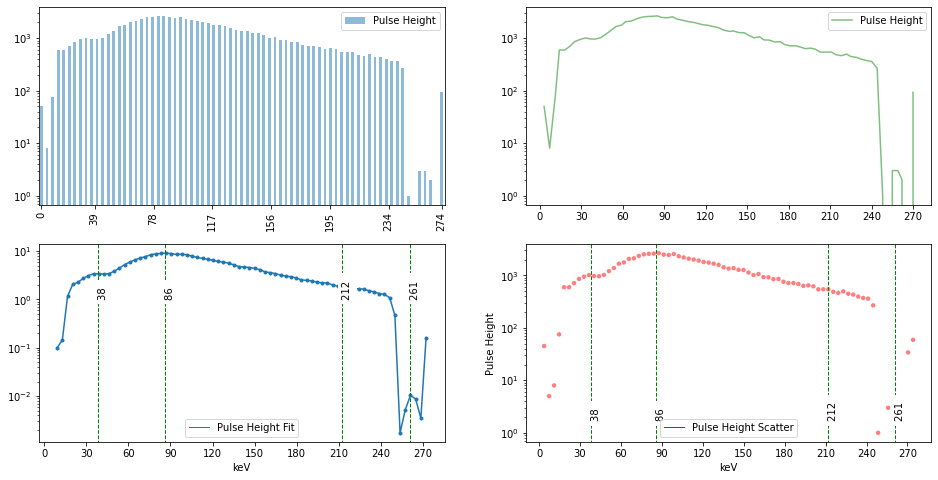

In [8]:
st.reset_calibration_lines()
for peak in st.plot_channel_pulse_height_spectrum("A", bins=74, rolling=2)[:2]:
    st.add_calibration_line_a(round(peak, 1))

#### Channel B

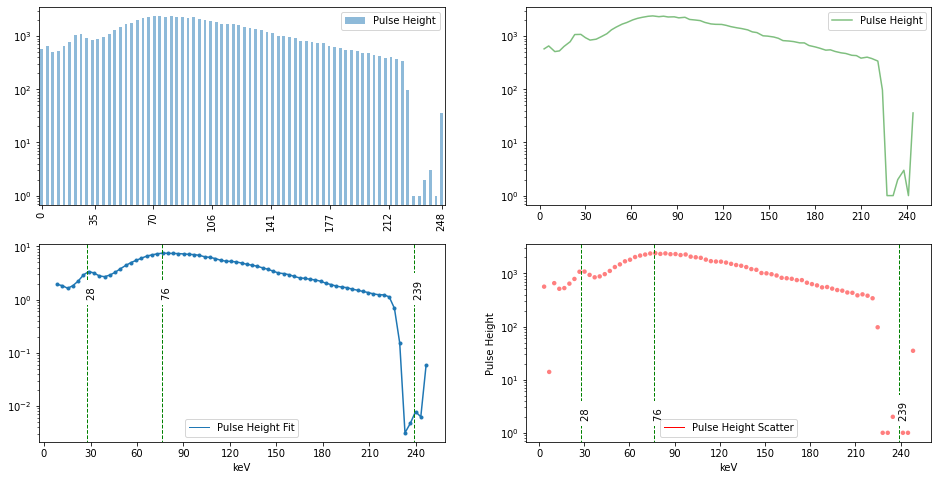

In [9]:
for peak in st.plot_channel_pulse_height_spectrum("B", coincidences=False, bins=73, rolling=2)[:2]:
    st.add_calibration_line_b(round(peak, 1))

### Coincidence time difference and scatter plots

Time difference is retrieved when one of the detectors triggers and if there is a pulse in the other detector then a time distance between clicks is calculated by substracting the index of the pulses and multiplying that by the resolution of the oscilloscope. Typically, when there is a peak in the middle of the time difference histogram, it suggests that clicks were coincident and caused either by the same ray passing both detectors or two simultaneous rays coming in a stream.

In the color scatter plot channels are distinguished by the red and blue colors. The size of the point relates to the time difference. Bigger the point, smaller is the time difference.

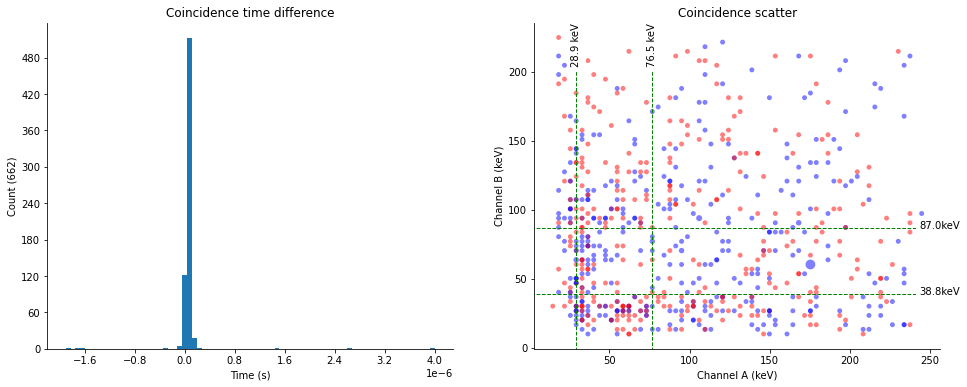

In [10]:
st.plot_time_histogram_and_scatter(hide_calibration=True)

### Coincident spectra

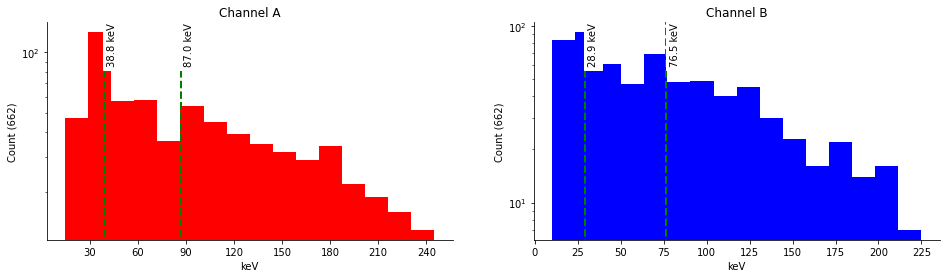

In [11]:
st.plot_spectra(coincidences=True, log=True, bins=(16, 16), hide_calibration=True);

In [12]:
st.print_stats_link()

<br/><center><h3>Download csv file: <a target='_blank' href='https://github.com/markomanninen/tandempiercerexperiment/raw/main/experiments\default_2022_2_21_10_50\statistics.csv'>statistics.csv</a></h3></center>

Output statistics head and tail:

In [13]:
st.stats

,RateCount,Time,Elapsed,A,B,TotA,TotB,RateA,RateB,Cnc,TotCnc,ElapsedCncRate,SampleCncRate,TimeDifference,APulseHeight,BPulseHeight,SampleSize,Chn
0,1,2022-02-21 08:50:40.225697756,0.131,1,0,1,0,"250,000.000",0.000,0,0,0.000,0.000,nan,3593,0,0.000,0
1,2,2022-02-21 08:50:40.507369041,0.412,0,1,1,1,"125,000.000","125,000.000",0,0,0.000,0.000,nan,0,5131,0.000,1
2,3,2022-02-21 08:50:41.303909540,1.209,1,0,2,1,"166,666.667","83,333.333",0,0,0.000,0.000,nan,12833,0,0.000,0
3,4,2022-02-21 08:50:41.390629292,1.296,0,1,2,2,"125,000.000","125,000.000",0,0,0.000,0.000,nan,0,10518,0.000,1
4,5,2022-02-21 08:50:41.480389357,1.385,1,0,3,2,"150,000.000","100,000.000",0,0,0.000,0.000,nan,15657,0,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156959,157003,2022-02-21 14:50:39.660362720,"21,599.565",1,0,78812,78816,"125,494.417","125,500.787",0,662,0.031,"1,054.120",nan,10780,0,0.628,0
156960,157004,2022-02-21 14:50:39.719855547,"21,599.625",0,1,78812,78817,"125,493.618","125,501.580",0,662,0.031,"1,054.113",nan,0,5387,0.628,1
156961,157005,2022-02-21 14:50:39.964687586,"21,599.870",1,0,78813,78817,"125,494.411","125,500.780",0,662,0.031,"1,054.107",nan,8983,0,0.628,0
156962,157006,2022-02-21 14:50:39.981642485,"21,599.887",0,1,78813,78818,"125,493.612","125,501.573",0,662,0.031,"1,054.100",nan,0,6926,0.628,1


In [14]:
load_styles("../report.css")